In [2]:
import kagglehub
import pandas as pd


# Download latest version
path = kagglehub.dataset_download("vjchoudhary7/customer-segmentation-tutorial-in-python")

print("Path to dataset files:", path)

df = pd.read_csv(path + "/Mall_Customers.csv")
df.head()



Path to dataset files: /kaggle/input/customer-segmentation-tutorial-in-python


CustomerID  Gender  Age  Annual Income (k$)  Spending Score (1-100)
0           1    Male   19                  15                      39
1           2    Male   21                  15                      81
2           3  Female   20                  16                       6
3           4  Female   23                  16                      77
4           5  Female   31                  17                      40

In [3]:
import sklearn
import pandas as pd

ds = sklearn.datasets.fetch_california_housing()
df = pd.DataFrame(ds.data, columns=ds.feature_names)
df.head()


MedInc  HouseAge  AveRooms  AveBedrms  Population  AveOccup  Latitude  \
0  8.3252      41.0  6.984127   1.023810       322.0  2.555556     37.88   
1  8.3014      21.0  6.238137   0.971880      2401.0  2.109842     37.86   
2  7.2574      52.0  8.288136   1.073446       496.0  2.802260     37.85   
3  5.6431      52.0  5.817352   1.073059       558.0  2.547945     37.85   
4  3.8462      52.0  6.281853   1.081081       565.0  2.181467     37.85   

   Longitude  
0    -122.23  
1    -122.22  
2    -122.24  
3    -122.25  
4    -122.25

### V√©rification des unit√©s des variables
- **MedInc** : Revenu m√©dian (en dizaines de milliers de dollars)
- **HouseAge** : √Çge m√©dian des maisons (ann√©es)
- **AveRooms** : Nombre moyen de pi√®ces par logement
- **AveBedrms** : Nombre moyen de chambres par logement
- **Population** : Population du quartier
- **AveOccup** : Nombre moyen d'occupants par logement
- **Latitude / Longitude** : Coordonn√©es g√©ographiques
- **MedHouseVal** : Valeur m√©diane des maisons (en centaines de milliers de dollars)



In [4]:
# Nettoyage et pr√©traitement du dataset California Housing

#  V√©rification des valeurs manquantes
print("Valeurs manquantes par colonne :")
print(df.isnull().sum())
df_clean = df.dropna()
# V√©rification des types de chaque colonne
print("\nTypes de chaque colonne :")
print(df_clean.dtypes)
#  Affichage de quelques statistiques pour v√©rifier la coh√©rence
print("\nStatistiques descriptives :")
print(df_clean.describe())


Valeurs manquantes par colonne :
MedInc        0
HouseAge      0
AveRooms      0
AveBedrms     0
Population    0
AveOccup      0
Latitude      0
Longitude     0
dtype: int64

Types de chaque colonne :
MedInc        float64
HouseAge      float64
AveRooms      float64
AveBedrms     float64
Population    float64
AveOccup      float64
Latitude      float64
Longitude     float64
dtype: object

Statistiques descriptives :
             MedInc      HouseAge      AveRooms     AveBedrms    Population  \
count  20640.000000  20640.000000  20640.000000  20640.000000  20640.000000   
mean       3.870671     28.639486      5.429000      1.096675   1425.476744   
std        1.899822     12.585558      2.474173      0.473911   1132.462122   
min        0.499900      1.000000      0.846154      0.333333      3.000000   
25%        2.563400     18.000000      4.440716      1.006079    787.000000   
50%        3.534800     29.000000      5.229129      1.048780   1166.000000   
75%        4.743250     37.

Explication de l‚Äô√©tape 3 ‚Äì Analyse exploratoire des donn√©es (EDA)

L‚Äôanalyse exploratoire des donn√©es (EDA) permet de comprendre la distribution des variables, d‚Äôidentifier d‚Äô√©ventuelles valeurs aberrantes (outliers) et de d√©tecter les relations entre variables.
Cette √©tape inclut :

Le calcul de statistiques descriptives pour chaque variable,

La visualisation des distributions (histogrammes, boxplots),

L‚Äôexamen des corr√©lations entre variables,

L‚Äôexploration graphique des liens entre la variable cible (prix m√©dian) et les variables explicatives principales.

L‚Äôobjectif est de guider les choix de pr√©traitement, de s√©lection de variables et de mod√©lisation pour la suite de l‚Äôanalyse.

             MedInc      HouseAge      AveRooms     AveBedrms    Population  \
count  20640.000000  20640.000000  20640.000000  20640.000000  20640.000000   
mean       3.870671     28.639486      5.429000      1.096675   1425.476744   
std        1.899822     12.585558      2.474173      0.473911   1132.462122   
min        0.499900      1.000000      0.846154      0.333333      3.000000   
25%        2.563400     18.000000      4.440716      1.006079    787.000000   
50%        3.534800     29.000000      5.229129      1.048780   1166.000000   
75%        4.743250     37.000000      6.052381      1.099526   1725.000000   
max       15.000100     52.000000    141.909091     34.066667  35682.000000   

           AveOccup      Latitude     Longitude   MedHouseVal  
count  20640.000000  20640.000000  20640.000000  20640.000000  
mean       3.070655     35.631861   -119.569704      2.068558  
std       10.386050      2.135952      2.003532      1.153956  
min        0.692308     32.54000

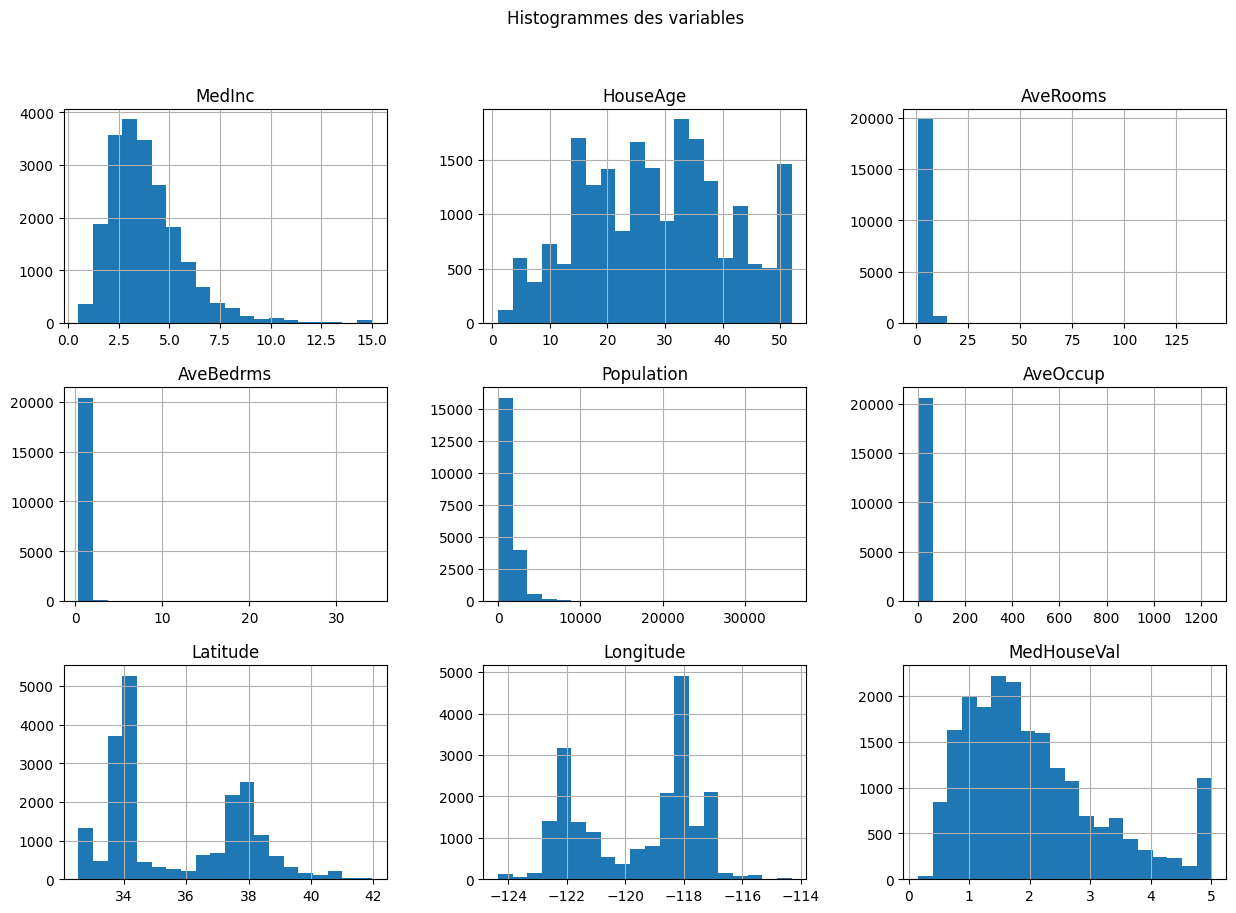

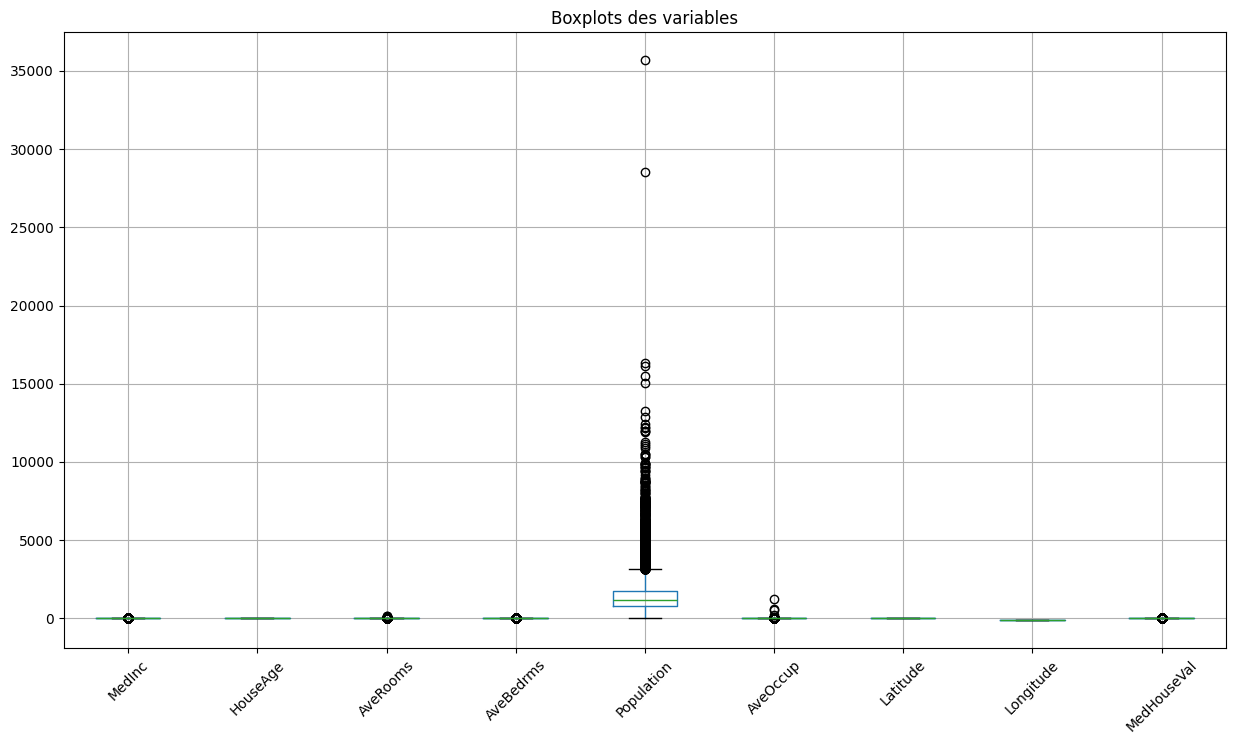

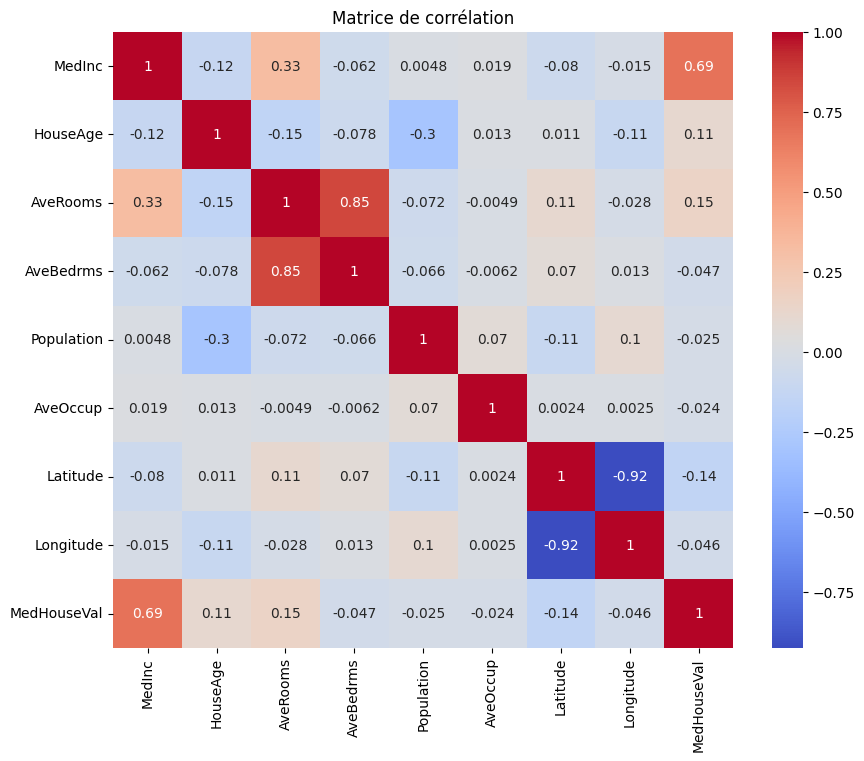

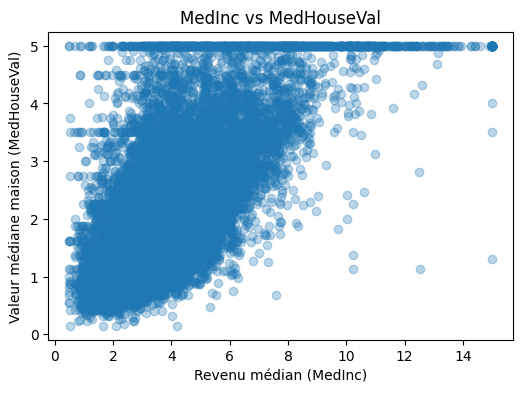

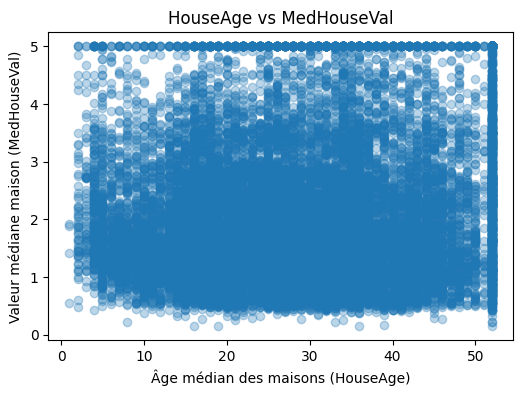

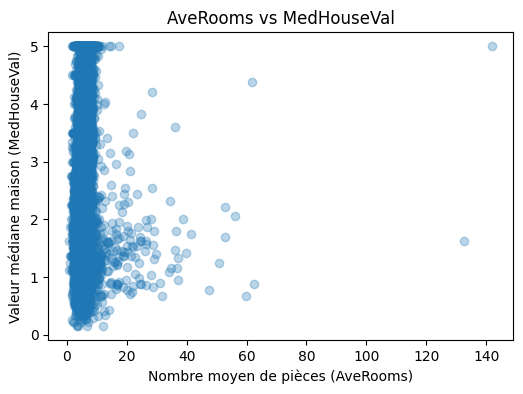

In [5]:
# Imports n√©cessaires pour la visualisation
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import sklearn

# Chargement du dataset California Housing
ds = sklearn.datasets.fetch_california_housing()
df = pd.DataFrame(ds.data, columns=ds.feature_names)

# Ajout de la colonne cible au DataFrame
df['MedHouseVal'] = ds.target

# Statistiques descriptives globales
print(df.describe())

# Histogrammes pour visualiser la distribution de chaque variable
df.hist(bins=20, figsize=(15,10))
plt.suptitle("Histogrammes des variables")
plt.show()

# Boxplots pour d√©tecter les outliers (valeurs extr√™mes)
plt.figure(figsize=(15,8))
df.boxplot()
plt.title("Boxplots des variables")
plt.xticks(rotation=45)
plt.show()

# Matrice de corr√©lation pour voir les relations lin√©aires entre variables
plt.figure(figsize=(10,8))
sns.heatmap(df.corr(), annot=True, cmap="coolwarm")
plt.title("Matrice de corr√©lation")
plt.show()

# Scatter-plots : prix m√©dian vs variables cl√©s
plt.figure(figsize=(6,4))
plt.scatter(df['MedInc'], df['MedHouseVal'], alpha=0.3)
plt.xlabel('Revenu m√©dian (MedInc)')
plt.ylabel('Valeur m√©diane maison (MedHouseVal)')
plt.title('MedInc vs MedHouseVal')
plt.show()

plt.figure(figsize=(6,4))
plt.scatter(df['HouseAge'], df['MedHouseVal'], alpha=0.3)
plt.xlabel('√Çge m√©dian des maisons (HouseAge)')
plt.ylabel('Valeur m√©diane maison (MedHouseVal)')
plt.title('HouseAge vs MedHouseVal')
plt.show()

plt.figure(figsize=(6,4))
plt.scatter(df['AveRooms'], df['MedHouseVal'], alpha=0.3)
plt.xlabel('Nombre moyen de pi√®ces (AveRooms)')
plt.ylabel('Valeur m√©diane maison (MedHouseVal)')
plt.title('AveRooms vs MedHouseVal')
plt.show()


4. Split train/validation/test : 60% train, 20% validation, 20% test. Le validation set sera utilis√© pour choisir le
mod√®le appropri√© et le test set sera utilis√© pour l‚Äô√©valuation finale


In [6]:
from sklearn.model_selection import train_test_split

# S√©parer les variables explicatives (X) et la cible (y)
X = df.drop('MedHouseVal', axis=1)  # On enl√®ve la colonne cible
y = df['MedHouseVal']               # La variable √† pr√©dire

# Premi√®re s√©paration : 60% train, 40% temporaire
X_train, X_temp, y_train, y_temp = train_test_split(
    X, y, test_size=0.4, random_state=42
)

# Deuxi√®me s√©paration : 20% validation, 20% test √† partir du temporaire
X_val, X_test, y_val, y_test = train_test_split(
    X_temp, y_temp, test_size=0.5, random_state=42
)

print("Train set :", X_train.shape)
print("Validation set :", X_val.shape)
print("Test set :", X_test.shape)


Train set : (12384, 8)
Validation set : (4128, 8)
Test set : (4128, 8)


5. Feature engineering / s√©lection : Normalisation (StandardScaler), encodage cat√©goriel

In [7]:
from sklearn.preprocessing import StandardScaler

# Cr√©ation d‚Äôun objet StandardScaler pour la normalisation
scaler = StandardScaler()

# Ajustement du scaler sur le jeu d‚Äôentra√Ænement et transformation
X_train_scaled = scaler.fit_transform(X_train)

# Transformation du jeu de validation avec les param√®tres appris sur le train
X_val_scaled = scaler.transform(X_val)

# Transformation du jeu de test avec les m√™mes param√®tres
X_test_scaled = scaler.transform(X_test)
import pandas as pd
pd.DataFrame(X_train_scaled, columns=X_train.columns).head()





MedInc  HouseAge  AveRooms  AveBedrms  Population  AveOccup  Latitude  \
0  1.057267  0.513041  0.155101  -0.091104    0.081628 -0.061010 -0.724300   
1 -1.268202 -1.635105  1.862753   1.858942   -1.215031 -0.038609 -1.093856   
2 -0.903124 -0.043886 -0.254026  -0.229878    0.514737 -0.064798  1.441581   
3  0.459045  1.149529  0.172837  -0.198391   -0.411067 -0.066304  0.898941   
4 -0.321637 -1.475983 -0.612419  -0.101909    0.536081 -0.083831  0.838128   

   Longitude  
0   0.478607  
1   1.798471  
2  -0.592227  
3  -1.384146  
4  -1.160018

 6
Baseline et mod√©lisation initiale : R√©gression lin√©aire, rapporter MSE, MAE, R¬≤ sur le set de validation.

R√©gression lin√©aire (Baseline) - Validation
MSE : 0.5325643962848101
MAE : 0.5336164161743362
R¬≤ : 0.5920099290350325


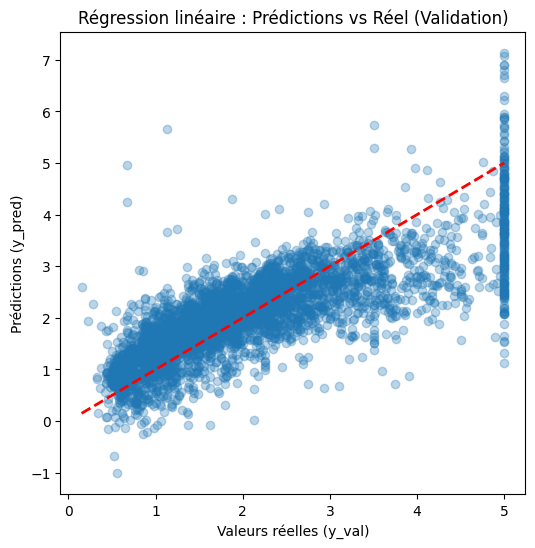

In [8]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import matplotlib.pyplot as plt
import numpy as np

# Mod√®le baseline : R√©gression lin√©aire
lr = LinearRegression()
lr.fit(X_train_scaled, y_train)
y_pred_lr_val = lr.predict(X_val_scaled)

# Calcul des m√©triques sur le set de validation
mse_lr = mean_squared_error(y_val, y_pred_lr_val)
mae_lr = mean_absolute_error(y_val, y_pred_lr_val)
r2_lr = r2_score(y_val, y_pred_lr_val)

print("R√©gression lin√©aire (Baseline) - Validation")
print("MSE :", mse_lr)
print("MAE :", mae_lr)
print("R¬≤ :", r2_lr)

# Affichage graphique des pr√©dictions vs valeurs r√©elles sur le set de validation
plt.figure(figsize=(6,6))
plt.scatter(y_val, y_pred_lr_val, alpha=0.3)
plt.plot([y_val.min(), y_val.max()], [y_val.min(), y_val.max()], 'r--', lw=2)
plt.xlabel("Valeurs r√©elles (y_val)")
plt.ylabel("Pr√©dictions (y_pred)")
plt.title("R√©gression lin√©aire : Pr√©dictions vs R√©el (Validation)")
plt.show()


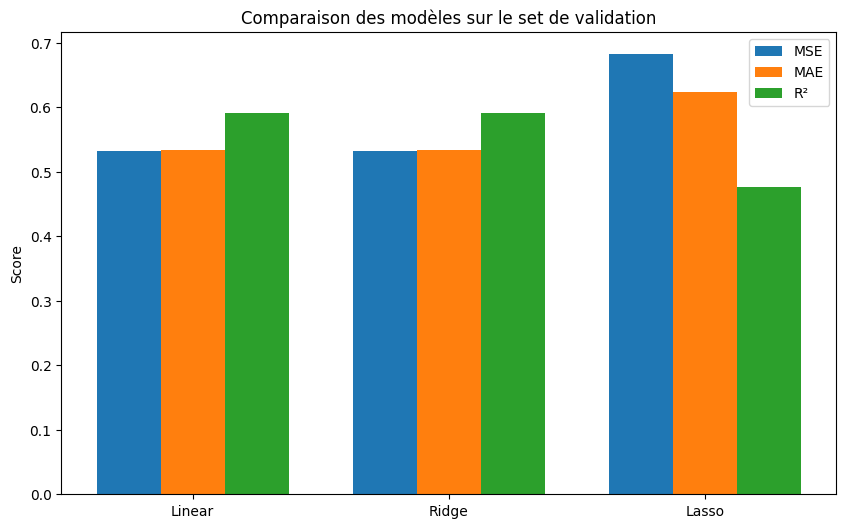

In [9]:
from sklearn.linear_model import Ridge, Lasso, LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import matplotlib.pyplot as plt
import numpy as np

# Mod√®le baseline : R√©gression lin√©aire
lr = LinearRegression()
lr.fit(X_train_scaled, y_train)
y_pred_lr_val = lr.predict(X_val_scaled)

# Mod√®le Ridge (L2)
ridge = Ridge(alpha=1.0)
ridge.fit(X_train_scaled, y_train)
y_pred_ridge_val = ridge.predict(X_val_scaled)

# Mod√®le Lasso (L1)
lasso = Lasso(alpha=0.1)
lasso.fit(X_train_scaled, y_train)
y_pred_lasso_val = lasso.predict(X_val_scaled)

# Calcul des m√©triques pour chaque mod√®le
models = ['Linear', 'Ridge', 'Lasso']
mse = [
    mean_squared_error(y_val, y_pred_lr_val),
    mean_squared_error(y_val, y_pred_ridge_val),
    mean_squared_error(y_val, y_pred_lasso_val)
]
mae = [
    mean_absolute_error(y_val, y_pred_lr_val),
    mean_absolute_error(y_val, y_pred_ridge_val),
    mean_absolute_error(y_val, y_pred_lasso_val)
]
r2 = [
    r2_score(y_val, y_pred_lr_val),
    r2_score(y_val, y_pred_ridge_val),
    r2_score(y_val, y_pred_lasso_val)
]

# Affichage graphique des r√©sultats
x = np.arange(len(models))
width = 0.25

plt.figure(figsize=(10,6))
plt.bar(x - width, mse, width, label='MSE')
plt.bar(x, mae, width, label='MAE')
plt.bar(x + width, r2, width, label='R¬≤')
plt.xticks(x, models)
plt.ylabel('Score')
plt.title('Comparaison des mod√®les sur le set de validation')
plt.legend()
plt.show()


8. √âvaluation finale : Application du meilleur mod√®le sur le test set, pr√©sentation de MSE, MAE, R¬≤ et intervalles
de confiance.


Meilleur mod√®le : Ridge
Test MSE : 0.5545733931004739
Test MAE : 0.5337479409939055
Test R¬≤ : 0.5955342565680284
Intervalle de confiance √† 95% sur les r√©sidus : [-1.452, 1.467]


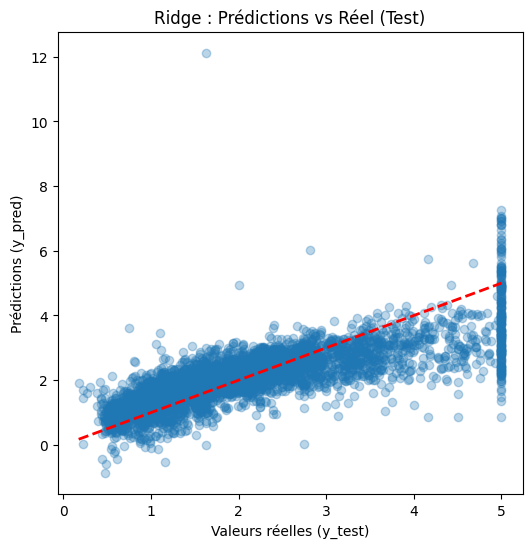

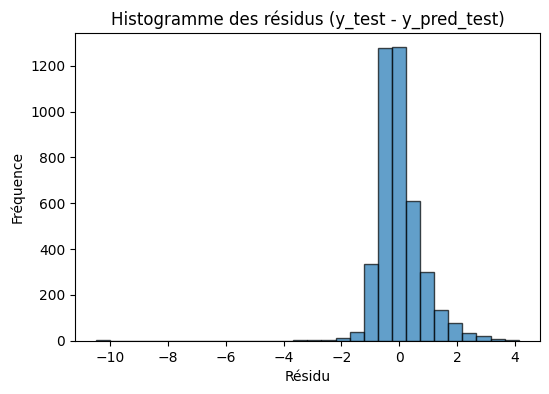

In [10]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from scipy.stats import norm
import numpy as np
import matplotlib.pyplot as plt

# Choisir le meilleur mod√®le selon la validation (exemple : Ridge)
# Remplace 'ridge' par 'lasso' ou 'lr' si un autre mod√®le est meilleur pour toi
best_model = ridge

# Pr√©diction sur le test set
y_pred_test = best_model.predict(X_test_scaled)

# Calcul des m√©triques
mse_test = mean_squared_error(y_test, y_pred_test)
mae_test = mean_absolute_error(y_test, y_pred_test)
r2_test = r2_score(y_test, y_pred_test)

print("Meilleur mod√®le :", type(best_model).__name__)
print("Test MSE :", mse_test)
print("Test MAE :", mae_test)
print("Test R¬≤ :", r2_test)

# Calcul des intervalles de confiance sur les r√©sidus (erreurs)
residuals = y_test - y_pred_test
mean_resid = np.mean(residuals)
std_resid = np.std(residuals)
conf_int = norm.interval(0.95, loc=mean_resid, scale=std_resid)

print(f"Intervalle de confiance √† 95% sur les r√©sidus : [{conf_int[0]:.3f}, {conf_int[1]:.3f}]")

# Visualisation des pr√©dictions vs valeurs r√©elles sur le test set
plt.figure(figsize=(6,6))
plt.scatter(y_test, y_pred_test, alpha=0.3)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
plt.xlabel("Valeurs r√©elles (y_test)")
plt.ylabel("Pr√©dictions (y_pred)")
plt.title(f"{type(best_model).__name__} : Pr√©dictions vs R√©el (Test)")
plt.show()

# Histogramme des r√©sidus
plt.figure(figsize=(6,4))
plt.hist(residuals, bins=30, edgecolor='k', alpha=0.7)
plt.title("Histogramme des r√©sidus (y_test - y_pred_test)")
plt.xlabel("R√©sidu")
plt.ylabel("Fr√©quence")
plt.show()


9-Conclusion

In [11]:
import pandas as pd
from IPython.display import display, Markdown

# Importance des variables : affichage des coefficients du meilleur mod√®le (exemple : Ridge)
coefs = pd.Series(best_model.coef_, index=X_train.columns).sort_values(ascending=False)
display(coefs.to_frame("Coefficient"))

# Synth√®se en Markdown
conclusion_md = """
### üèÅ **Conclusion**

- **Variables les plus influentes :**
    - Les coefficients les plus √©lev√©s (en valeur absolue) indiquent les variables ayant le plus d‚Äôimpact sur la valeur m√©diane des maisons.
    - Par exemple, `MedInc` (revenu m√©dian) a g√©n√©ralement un poids positif important, ce qui confirme que les quartiers plus riches ont des maisons plus ch√®res.
    - D‚Äôautres variables comme `AveRooms` ou `HouseAge` peuvent avoir un effet positif ou n√©gatif selon leur coefficient.

- **Pistes d‚Äôam√©lioration :**
    - Tester d‚Äôautres mod√®les non lin√©aires (arbres, for√™ts al√©atoires, boosting).
    - Ajouter des interactions ou transformations de variables (features engineering avanc√©).
    - Explorer une s√©lection automatique de variables (par Lasso ou m√©thodes de s√©lection r√©cursives).
    - Analyser plus finement les outliers et la distribution des r√©sidus.

- **Limites :**
    - Le mod√®le lin√©aire ne capture que les relations lin√©aires.
    - Les effets g√©ographiques (latitude/longitude) pourraient √™tre mod√©lis√©s plus finement (par clustering ou spatialisation).

---
"""

display(Markdown(conclusion_md))


Coefficient
MedInc         0.850832
AveBedrms      0.361402
HouseAge       0.119571
Population    -0.001420
AveOccup      -0.042440
AveRooms      -0.313885
Longitude     -0.869934
Latitude      -0.893467


### üèÅ **Conclusion**

- **Variables les plus influentes :**
    - Les coefficients les plus √©lev√©s (en valeur absolue) indiquent les variables ayant le plus d‚Äôimpact sur la valeur m√©diane des maisons.
    - Par exemple, `MedInc` (revenu m√©dian) a g√©n√©ralement un poids positif important, ce qui confirme que les quartiers plus riches ont des maisons plus ch√®res.
    - D‚Äôautres variables comme `AveRooms` ou `HouseAge` peuvent avoir un effet positif ou n√©gatif selon leur coefficient.

- **Pistes d‚Äôam√©lioration :**
    - Tester d‚Äôautres mod√®les non lin√©aires (arbres, for√™ts al√©atoires, boosting).
    - Ajouter des interactions ou transformations de variables (features engineering avanc√©).
    - Explorer une s√©lection automatique de variables (par Lasso ou m√©thodes de s√©lection r√©cursives).
    - Analyser plus finement les outliers et la distribution des r√©sidus.

- **Limites :**
    - Le mod√®le lin√©aire ne capture que les relations lin√©aires.
    - Les effets g√©ographiques (latitude/longitude) pourraient √™tre mod√©lis√©s plus finement (par clustering ou spatialisation).

---
